# 1 Introduction

> Notebook com a análise dos países do grupo do Brasil

## 1.1 Business needs

> Entender os países que possuem um aspecto similar ao Brasil em 2017 para posteriormente analisar que variáveis fizeram melhorar ou piorar 

## 1.2 Dependencies

> Notebooks executados previamente:
* 04_el_clustering_model_2.ipynb

> Bibliotecas que devem estar instaladas para execução deste notebook

In [32]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install math
# !pip install matplotlib
# !pip install warnings

## 1.3 Imports

> Import all libraries needed. Include the latest versions used to allow reproducibility.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

import matplotlib.pyplot as plt

import warnings

In [3]:
warnings.filterwarnings('ignore')

## 1.4 Global variables

> Declare all variables that will retain a constant value throught the notebook. For exemple, the path to the input data should be a global variable.

# 2 Exploratory data analysis

> Write a brief summary about which analysis and wrangling was performed.

## 2.1 Data reading

> Give a brief introduction to the data used and their sources.

In [4]:
df = pd.read_csv("../data/processed/Tabela_unificada.csv", encoding='ISO-8859–1')

# Dados do cluster do Brasil em 2017
df_cluster = pd.read_excel("../data/processed/cluster_br_2.xlsx")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Columns: 266 entries, Area Code to Value of food imports in total merchandise exports (percent) (3-year average)
dtypes: float64(263), int64(2), object(1)
memory usage: 2.1+ MB


In [6]:
df.head()

,Area Code,Area,Year,Cost of a healthy diet (PPP dollar per person per day),Cost of animal source foods,Cost of fruits,"Cost of legumes, nuts and seeds",Cost of oils and fats,Cost of starchy staples,Cost of vegetables,...,Per capita food supply variability (kcal/cap/day),Percentage of population using at least basic drinking water services (percent),Percentage of population using at least basic sanitation services (percent),Percentage of population using safely managed drinking water services (percent),Percentage of population using safely managed sanitation services (percent),Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),"Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average)
0,1,Armenia,2017,3.096,0.973,0.488,0.541,0.123,0.537,0.433,...,42.0,99.0,93.5,85.4,64.6,NaN,NaN,2.5,42.0,29.0
1,1,Armenia,2018,3.166,NaN,NaN,NaN,NaN,NaN,NaN,...,65.0,99.0,93.7,85.9,66.1,17.1,1.2,2.5,43.0,26.0
2,1,Armenia,2019,3.237,NaN,NaN,NaN,NaN,NaN,NaN,...,60.0,99.0,93.9,86.4,67.8,14.8,1.1,2.5,43.0,25.0
3,1,Armenia,2020,3.247,NaN,NaN,NaN,NaN,NaN,NaN,...,47.0,99.0,93.9,86.9,69.3,11.7,0.8,2.5,44.0,24.0
4,1,Armenia,2021,3.527,NaN,NaN,NaN,NaN,NaN,NaN,...,38.0,NaN,NaN,NaN,NaN,8.3,0.5,2.5,NaN,24.0


In [7]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Unnamed: 0                                                                     20 non-null     int64  
 1   index                                                                          20 non-null     int64  
 2   Area                                                                           20 non-null     object 
 3   Year                                                                           20 non-null     int64  
 4   Cost of a healthy diet (PPP dollar per person per day)                         20 non-null     float64
 5   Coefficient of human inequality                                                20 non-null     float64
 6   Human Development Index (val

In [8]:
df_cluster.head()

,Unnamed: 0,index,Area,Year,Cost of a healthy diet (PPP dollar per person per day),Coefficient of human inequality,Human Development Index (value),Inequality in eduation,Inequality in income,Inequality in life expectancy,2.a.1 Agriculture share of Government Expenditure,2.a.1 Agriculture value added share of GDP,6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322)),6.4.1 Water Use Efficiency (Industries),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),Value of food imports in total merchandise exports (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Percentage of the population unable to afford a healthy diet (percent)
0,0,0,Armenia,2017,3.096,10.007349,0.775,2.93495,18.95179,8.135306,2.49,14.99,0.30,19.72,12509.6,42,29,2.5,37.1
1,1,10,Albania,2017,3.952,13.890872,0.796,12.33344,23.21014,6.129035,2.21,19.02,1.22,19.65,12771.0,46,25,4.2,31.3
2,2,15,Algeria,2017,3.763,21.383477,0.738,33.68956,16.80919,13.651680,3.16,11.76,0.86,324.62,11809.5,27,25,2.6,32.5
3,8,85,Bolivia (Plurinational State of),2017,3.551,24.229746,0.707,19.30220,33.80645,19.580589,2.38,11.59,0.37,271.46,8244.9,25,8,14.9,20.9
4,10,95,Brazil,2017,2.809,23.035445,0.758,16.51122,42.52005,10.075064,0.93,4.60,0.39,29.37,14477.9,37,4,2.5,19.6


## 2.2 Data wrangling

### Preparação dos dados para a análise

Manter:
* Dados históricos de 2017 e 2021 dos países do cluster
* Dados não nulos

#### Colunas a serem consideradas

In [9]:
df2 = df[(df['Area'].isin(df_cluster['Area'])) & (df['Year'].isin([2017, 2021]))].copy(deep=True)

In [23]:
df_features = [ 'Area', 'Year',
'Cost of a healthy diet (PPP dollar per person per day)', 
'Coefficient of human inequality',
'Human Development Index (value)', 
'Inequality in eduation',
'Inequality in income', 
'Inequality in life expectancy',
'2.a.1 Agriculture share of Government Expenditure', 
'2.a.1 Agriculture value added share of GDP', 
'6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322))', 
'6.4.1 Water Use Efficiency (Industries)',
'Gross domestic product per capita, PPP, (constant 2017 international $)',
'Per capita food supply variability (kcal/cap/day)', 
'Value of food imports in total merchandise exports (percent) (3-year average)',
'Prevalence of undernourishment (percent) (3-year average)',
'Percentage of the population unable to afford a healthy diet (percent)'] 

df_independents = [ 
'Cost of a healthy diet (PPP dollar per person per day)', 
'Coefficient of human inequality',
'Human Development Index (value)', 
'Inequality in eduation',
'Inequality in income', 
'Inequality in life expectancy',
'2.a.1 Agriculture share of Government Expenditure', 
'2.a.1 Agriculture value added share of GDP', 
'6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322))', 
'6.4.1 Water Use Efficiency (Industries)',
'Gross domestic product per capita, PPP, (constant 2017 international $)',
'Per capita food supply variability (kcal/cap/day)', 
'Value of food imports in total merchandise exports (percent) (3-year average)',
'Prevalence of undernourishment (percent) (3-year average)',
'Percentage of the population unable to afford a healthy diet (percent)'] 

df3 = df2[df_features].dropna().copy(deep=True)

In [30]:
df3

,Area,Year,Cost of a healthy diet (PPP dollar per person per day),Coefficient of human inequality,Human Development Index (value),Inequality in eduation,Inequality in income,Inequality in life expectancy,2.a.1 Agriculture share of Government Expenditure,2.a.1 Agriculture value added share of GDP,6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322)),6.4.1 Water Use Efficiency (Industries),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),Value of food imports in total merchandise exports (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Percentage of the population unable to afford a healthy diet (percent)
0,Armenia,2017,3.096,10.007349,0.775,2.93495,18.95179,8.135306,2.49,14.99,0.30,19.72,12509.6,42.0,29.0,2.5,37.1
4,Armenia,2021,3.527,8.363881,0.774,2.93495,15.12082,7.035874,2.34,11.34,0.17,26.93,14193.1,38.0,24.0,2.5,41.4
10,Albania,2017,3.952,13.890872,0.796,12.33344,23.21014,6.129035,2.21,19.02,1.22,19.65,12771.0,46.0,25.0,4.2,31.3
14,Albania,2021,4.388,12.952808,0.785,12.33344,19.73435,6.790635,2.76,17.68,1.71,250.26,14516.3,13.0,24.0,4.1,15.9
15,Algeria,2017,3.763,21.383477,0.738,33.68956,16.80919,13.651680,3.16,11.76,0.86,324.62,11809.5,27.0,25.0,2.6,32.5
19,Algeria,2021,4.043,20.840871,0.740,33.28262,16.80919,12.430804,2.78,12.18,0.89,349.84,11039.8,45.0,28.0,2.5,32.4
85,Bolivia (Plurinational State of),2017,3.551,24.229746,0.707,19.30220,33.80645,19.580589,2.38,11.59,0.37,271.46,8244.9,25.0,8.0,14.9,20.9
89,Bolivia (Plurinational State of),2021,3.927,19.991828,0.691,15.04060,26.91283,18.022055,1.99,12.92,0.48,278.16,8052.2,18.0,7.0,16.2,15.1
95,Brazil,2017,2.809,23.035445,0.758,16.51122,42.52005,10.075064,0.93,4.60,0.39,29.37,14477.9,37.0,4.0,2.5,19.6
99,Brazil,2021,3.350,22.531672,0.756,13.88125,43.72531,9.988457,0.83,6.89,0.63,30.47,14592.4,27.0,4.0,3.7,22.4


#### Ajuste dos tipos de dados

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 0 to 996
Data columns (total 17 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Area                                                                           40 non-null     object 
 1   Year                                                                           40 non-null     int64  
 2   Cost of a healthy diet (PPP dollar per person per day)                         40 non-null     float64
 3   Coefficient of human inequality                                                40 non-null     float64
 4   Human Development Index (value)                                                40 non-null     float64
 5   Inequality in eduation                                                         40 non-null     float64
 6   Inequality in income            

In [24]:
df3[['Area']] = df3[['Area']].astype('string')
df3[['Year']] = df3[['Year']].astype('int')
df3[df_independents] = df3[df_independents].astype('float')

df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 0 to 996
Data columns (total 17 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Area                                                                           40 non-null     string 
 1   Year                                                                           40 non-null     int64  
 2   Cost of a healthy diet (PPP dollar per person per day)                         40 non-null     float64
 3   Coefficient of human inequality                                                40 non-null     float64
 4   Human Development Index (value)                                                40 non-null     float64
 5   Inequality in eduation                                                         40 non-null     float64
 6   Inequality in income            

In [17]:
# # Salvando em CSV
# df3.to_csv('../reports/cluster_com_selecao_features.csv', index=False)
# # Salvando em Excel
# df3.to_excel('../reports/cluster_com_selecao_features.xlsx', index=False)

## 2.3 Exploration Analysis

### Análise das Distribuições

In [25]:
df3_2017 = df3[df3['Year'] == 2017].set_index('Area')
df3_2021 = df3[df3['Year'] == 2021].set_index('Area')

In [44]:
df3_delta = df3_2017.sub(df3_2021).dropna()
df3_delta.reset_index(inplace=True)
df3_delta.sort_values(by='Percentage of the population unable to afford a healthy diet (percent)')

,Area,Year,Cost of a healthy diet (PPP dollar per person per day),Coefficient of human inequality,Human Development Index (value),Inequality in eduation,Inequality in income,Inequality in life expectancy,2.a.1 Agriculture share of Government Expenditure,2.a.1 Agriculture value added share of GDP,6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322)),6.4.1 Water Use Efficiency (Industries),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),Value of food imports in total merchandise exports (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Percentage of the population unable to afford a healthy diet (percent)
5,Colombia,-4,-0.438,-1.617055,0.013,1.90230,-7.18754,0.434076,0.09,-1.04,0.02,-210.50,-313.7,2.0,-2.0,-1.8,-6.5
0,Armenia,-4,-0.431,1.643467,0.001,0.00000,3.83097,1.099432,0.15,3.65,0.13,-7.21,-1683.5,4.0,5.0,0.0,-4.3
4,Brazil,-4,-0.541,0.503772,0.002,2.62997,-1.20526,0.086607,0.10,-2.29,-0.24,-1.10,-114.5,10.0,0.0,-1.2,-2.8
7,Ecuador,-4,-0.247,0.346820,0.016,1.95767,-1.83443,0.917220,0.39,-0.08,0.05,3.70,1010.6,35.0,-1.0,-4.4,-2.1
13,Nicaragua,-4,-0.349,0.465916,-0.009,0.00000,0.00000,1.397749,-0.49,-0.48,-0.01,-5228.60,276.7,16.0,1.0,0.4,-1.9
17,Tunisia,-4,-0.357,1.435605,0.003,3.87407,0.00000,0.432745,-1.88,-1.15,-0.04,-47.89,477.0,-8.0,0.0,-0.1,-1.6
9,Iraq,-4,-0.287,0.914218,0.000,0.88511,0.00000,1.857545,0.08,-1.05,-0.05,-0.64,1014.5,1.0,0.0,1.2,-1.6
8,Gabon,-4,-0.346,1.514220,0.012,2.84397,0.00000,1.698690,-0.72,-0.92,-0.06,-44.63,664.4,-2.0,2.0,-4.7,-1.4
6,Dominican Republic,-4,-0.607,1.966563,0.005,1.11799,3.99979,0.781908,-0.57,-0.33,-0.06,-12.46,-2101.6,16.0,-3.0,0.4,-0.9
14,Paraguay,-4,-0.437,2.419018,0.009,0.19720,5.75694,1.302915,0.41,-0.23,-0.02,-10.99,-83.5,40.0,-1.0,-0.8,-0.5


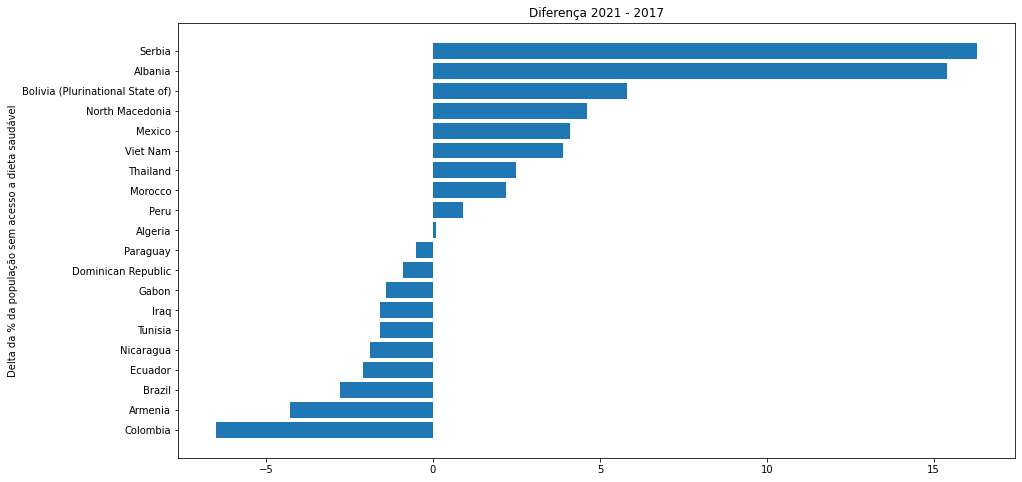

In [47]:
plt.figure(figsize=(15,8))
plt.title('Diferença 2021 - 2017')
plt.ylabel('Delta da % da população sem acesso a dieta saudável')


plt_y, plt_x = list(zip(*sorted(zip(df3_delta['Percentage of the population unable to afford a healthy diet (percent)'], 
                                    df3_delta['Area']), 
                                reverse=False)))

plt.barh(plt_x, plt_y)
plt.show()

In [49]:
df3_delta[df3_delta['Area'].isin(['Serbia', 'Albania', 'Brazil'])]

,Area,Year,Cost of a healthy diet (PPP dollar per person per day),Coefficient of human inequality,Human Development Index (value),Inequality in eduation,Inequality in income,Inequality in life expectancy,2.a.1 Agriculture share of Government Expenditure,2.a.1 Agriculture value added share of GDP,6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322)),6.4.1 Water Use Efficiency (Industries),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),Value of food imports in total merchandise exports (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Percentage of the population unable to afford a healthy diet (percent)
1,Albania,-4,-0.436,0.938063,0.011,0.00000,3.47579,-0.661600,-0.55,1.34,-0.49,-230.61,-1745.3,33.0,1.0,0.1,15.4
4,Brazil,-4,-0.541,0.503772,0.002,2.62997,-1.20526,0.086607,0.10,-2.29,-0.24,-1.10,-114.5,10.0,0.0,-1.2,-2.8
19,Serbia,-4,-0.276,2.651342,-0.002,1.88944,5.80828,0.256307,0.21,-0.52,-0.03,-0.54,-3216.8,77.0,-1.0,0.0,16.3


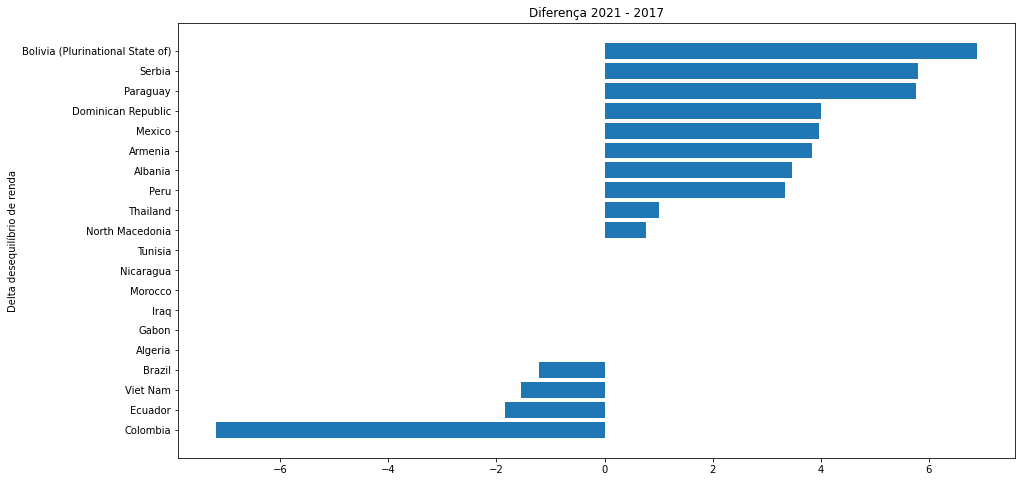

In [50]:
plt.figure(figsize=(15,8))
plt.title('Diferença 2021 - 2017')
plt.ylabel('Delta desequilíbrio de renda')


plt_y, plt_x = list(zip(*sorted(zip(df3_delta['Inequality in income'], 
                                    df3_delta['Area']), 
                                reverse=False)))

plt.barh(plt_x, plt_y)
plt.show()

# 3 Data modeling

> Give a brief introduction about the model. If you feel it would help, explain the math behind it.

## 3.1 Identifying key variables

> Guide the reader around the thought proccess about which variables were considered key to the model.

## 3.2 Building the model

> Guide the reader throughout the implementation and the decision of using the chosen model.

## 3.3 Extracting insights

> Be very thorough about which insights can be concluded from the data and how.

# 4 Conclusion

> Summarize the insights previously found.

## 4.1 Discussion

> What makes those insights relevant and how do they relate to the initial business needs?

## 4.2 Next steps

> If it makes sense, talk about the next logical steps that should follow the conclusion.